In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
az = pd.read_csv(r"C:\Users\arinc\OneDrive\Desktop\spam.csv", encoding = "cp1252")

In [3]:
az.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
az.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4358,ham,ÌÏ only send me the contents page...,NaN,NaN,NaN
1442,ham,"Its ok., i just askd did u knw tht no?",NaN,NaN,NaN
3012,spam,FREE UNLIMITED HARDCORE PORN direct 2 your mob...,NaN,NaN,NaN
293,ham,Are you this much buzy,NaN,NaN,NaN
2180,ham,Babe ! How goes that day ? What are you doing ...,NaN,NaN,NaN


In [5]:
az.shape

(5572, 5)

In [6]:
az.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
az.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
az.sample(5)

,v1,v2
152,ham,Ok... Ur typical reply...
4548,ham,"Haha, my friend tyler literally just asked if ..."
506,ham,"Maybe westshore or hyde park village, the plac..."
91,ham,Sorry to be a pain. Is it ok if we meet anothe...
804,ham,K I'll be there before 4.


In [9]:
az.rename(columns={'v1':'target','v2':'text' }, inplace=True)

In [10]:
az.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [12]:
az['target'] = Le.fit_transform(az['target'])

In [13]:
az.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
az.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
az.duplicated().sum()

403

In [16]:
az = az.drop_duplicates(keep='first')

In [17]:
az.duplicated().sum()


0

In [18]:
az.shape

(5169, 2)

In [19]:
import matplotlib.pyplot as plt

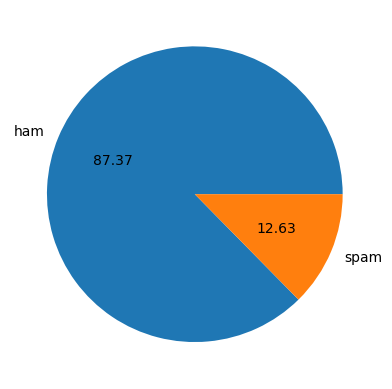

In [20]:
plt.pie(az['target'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arinc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
az['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [30]:
az['num_words'] = az['text'].apply(lambda x:len(nltk.word_tokenize(x)))

TypeError: expected string or bytes-like object

In [27]:
az

,target,text,sentence
0,0,24,2
1,0,8,2
2,1,37,2
3,0,13,1
4,0,15,1
...,...,...,...
5567,1,35,4
5568,0,9,1
5569,0,15,2
5570,0,27,1
